<a href="https://colab.research.google.com/github/Hengameh1392/Health/blob/main/Copy_of_Curtailmentv11_feature_selection_spearman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Preprocessing

##1.1 Import necessary

In [ ]:
#mount google drive
import os, sys
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
dataset_path = "gdrive/MyDrive/Curtailment/AllMerged.csv"

In [ ]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import preprocessing

## 1.2 Read data and merge records

In [ ]:
df_data = pd.read_csv(dataset_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862785 entries, 0 to 862784
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date                            862785 non-null  object 
 1   Hour                            862785 non-null  int64  
 2   Interval                        862785 non-null  int64  
 3   Load                            862785 non-null  int64  
 4   Solar                           862785 non-null  int64  
 5   Wind                            862785 non-null  int64  
 6   Net Load                        862785 non-null  int64  
 7   Renewables                      862785 non-null  int64  
 8   Nuclear                         862785 non-null  int64  
 9   Large Hydro                     862785 non-null  int64  
 10  Imports                         862785 non-null  int64  
 11  Generation                      862785 non-null  int64  
 12  Thermal         

In [ ]:
df_data.rename(columns = {'Wind Curtailment':'Wind_Curtailment','Solar Curtailment':'Solar_Curtailment'}, inplace = True)

In [ ]:
df_data[df_data.Wind_Curtailment!=0]

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment
314,2014-05-02,4,2,21762,0,2770,18992,4318,2287,1115,7306,14459,6739,-3,101.0,0.0
315,2014-05-02,4,3,21726,0,2725,19001,4273,2287,1120,7319,14407,6727,0,100.0,0.0
316,2014-05-02,4,4,21885,0,2633,19252,4180,2287,1231,7528,14366,6667,-9,84.0,0.0
317,2014-05-02,4,5,22010,0,2615,19395,4165,2287,1299,7622,14387,6635,0,25.0,0.0
319,2014-05-02,4,7,21973,0,2556,19417,4108,2287,1249,7618,14357,6712,-1,74.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862690,2022-06-30,17,12,35727,12102,3381,20244,17205,2268,2469,3175,32561,10618,-10,29.0,145.0
862711,2022-06-30,19,1,36515,9496,3760,23259,14960,2266,3007,4312,32188,11954,16,97.0,0.0
862713,2022-06-30,19,2,36466,9024,3818,23624,14548,2265,3122,4478,31994,12059,-6,93.0,0.0
862715,2022-06-30,19,3,36508,8602,3905,24001,14214,2266,3184,4608,31899,12235,2,6.0,0.0


In [ ]:
df_mean=df_data.groupby(['Date','Hour']).mean()
df_mean

Interval          Load        Solar         Wind  \
Date       Hour                                                     
2014-05-01 1          6.5  23355.750000     0.000000   280.833333   
           2          6.5  22256.916667     0.000000   360.166667   
           3          6.5  21871.166667     0.000000   480.333333   
           4          6.5  21789.833333     0.000000   598.250000   
           5          6.5  22113.750000     0.000000   469.583333   
...                   ...           ...          ...          ...   
2022-06-30 20         6.5  35761.333333  1736.416667  3784.583333   
           21         6.5  34867.666667    15.666667  3772.083333   
           22         6.5  33819.500000     0.000000  3992.166667   
           23         6.5  31523.000000     0.000000  4164.333333   
           24         6.5  29020.916667     0.000000  4091.250000   

                     Net Load   Renewables      Nuclear  Large Hydro  \
Date       Hour                                                        
2014-05-01 1     23074.666667  1848.416667  2287.250000  1399.083333   
           2     21896.750000  1919.833333  2287.500000  1115.166667   
           3     21390.750000  2010.666667  2286.083333  1269.750000   
           4     21191.500000  2135.166667  2286.500000  1382.083333   
           5     21644.250000  2007.750000  2287.416667  1130.666667   
...                       ...          ...          ...          ...   
2022-06-30 20    30240.666667  7240.083333  2265.083333  4294.333333   
           21    31079.916667  5553.416667  2266.083333  4271.750000   
           22    29827.333333  5766.333333  2266.916667  3969.333333   
           23    27358.750000  5862.333333  2268.500000  3312.250000   
           24    24929.500000  5784.833333  2270.416667  2911.000000   

                     Imports    Generation       Thermal  \
Date       Hour                                            
2014-05-01 1     7413.166667  15940.333333  10405.750000   
           2     7399.666667  14857.916667   9535.833333   
           3     7468.333333  14402.583333   8836.166667   
           4     7436.250000  14353.250000   8549.750000   
           5     7536.333333  14576.833333   9151.333333   
...                      ...           ...           ...   
2022-06-30 20    4850.083333  30904.833333  17105.500000   
           21    4643.166667  30219.416667  18128.166667   
           22    5272.416667  28538.250000  16536.000000   
           23    6193.666667  25311.250000  13868.250000   
           24    7081.250000  21926.333333  10960.166667   

                 Load Less (Generation+Imports)  Wind_Curtailment  \
Date       Hour                                                     
2014-05-01 1                           2.083333              0.00   
           2                          -0.666667              0.00   
           3                           0.250000              0.00   
           4                           0.166667              0.00   
           5                           0.750000              0.00   
...                                         ...               ...   
2022-06-30 20                          6.583333              0.00   
           21                          5.250000              2.25   
           22                          8.666667              0.00   
           23                         17.916667              0.00   
           24                         13.250000              0.00   

                 Solar_Curtailment  
Date       Hour                     
2014-05-01 1                   0.0  
           2                   0.0  
           3                   0.0  
           4                   0.0  
           5                   0.0  
...                            ...  
2022-06-30 20                  0.0  
           21                  0.0  
           22                  0.0  
           23                  0.0  
           24                  0.0  

[71569 rows x 14 colu

In [ ]:
df_mean = df_mean.reset_index()
df_mean

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment
0,2014-05-01,1,6.5,23355.750000,0.000000,280.833333,23074.666667,1848.416667,2287.250000,1399.083333,7413.166667,15940.333333,10405.750000,2.083333,0.00,0.0
1,2014-05-01,2,6.5,22256.916667,0.000000,360.166667,21896.750000,1919.833333,2287.500000,1115.166667,7399.666667,14857.916667,9535.833333,-0.666667,0.00,0.0
2,2014-05-01,3,6.5,21871.166667,0.000000,480.333333,21390.750000,2010.666667,2286.083333,1269.750000,7468.333333,14402.583333,8836.166667,0.250000,0.00,0.0
3,2014-05-01,4,6.5,21789.833333,0.000000,598.250000,21191.500000,2135.166667,2286.500000,1382.083333,7436.250000,14353.250000,8549.750000,0.166667,0.00,0.0
4,2014-05-01,5,6.5,22113.750000,0.000000,469.583333,21644.250000,2007.750000,2287.416667,1130.666667,7536.333333,14576.833333,9151.333333,0.750000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71564,2022-06-30,20,6.5,35761.333333,1736.416667,3784.583333,30240.666667,7240.083333,2265.083333,4294.333333,4850.083333,30904.833333,17105.500000,6.583333,0.00,0.0
71565,2022-06-30,21,6.5,34867.666667,15.666667,3772.083333,31079.916667,5553.416667,2266.083333,4271.750000,4643.166667,30219.416667,18128.166667,5.250000,2.25,0.0
71566,2022-06-30,22,6.5,33819.500000,0.000000,3992.166667,29827.333333,5766.333333,2266.916667,3969.333333,5272.416667,28538.250000,16536.000000,8.666667,0.00,0.0
71567,2022-06-30,23,6.5,31523.000000,0.000000,4164.333333,27358.750000,5862.333333,2268.500000,3312.250000,6193.666667,25311.250000,13868.250000,17.916667,0.00,0.0


##1.3 Split by month

In [ ]:
df_mean['month']=pd.DatetimeIndex(df_mean['Date']).month



In [ ]:
df_mean.head()

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month
0,2014-05-01,1,6.5,23355.750000,0.0,280.833333,23074.666667,1848.416667,2287.250000,1399.083333,7413.166667,15940.333333,10405.750000,2.083333,0.0,0.0,5
1,2014-05-01,2,6.5,22256.916667,0.0,360.166667,21896.750000,1919.833333,2287.500000,1115.166667,7399.666667,14857.916667,9535.833333,-0.666667,0.0,0.0,5
2,2014-05-01,3,6.5,21871.166667,0.0,480.333333,21390.750000,2010.666667,2286.083333,1269.750000,7468.333333,14402.583333,8836.166667,0.250000,0.0,0.0,5
3,2014-05-01,4,6.5,21789.833333,0.0,598.250000,21191.500000,2135.166667,2286.500000,1382.083333,7436.250000,14353.250000,8549.750000,0.166667,0.0,0.0,5
4,2014-05-01,5,6.5,22113.750000,0.0,469.583333,21644.250000,2007.750000,2287.416667,1130.666667,7536.333333,14576.833333,9151.333333,0.750000,0.0,0.0,5


#2.Feature Extraction

##2.1 Biomass_Geothermal

In [ ]:
df_mean["Biomass_geothermal"]=df_mean["Renewables"]-df_mean["Solar"]-df_mean["Wind"]

##2.2 Extract Business days

### Find holidays


In [ ]:
df_mean["isBusDay"]=1
df_mean


,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay
0,2014-05-01,1,6.5,23355.750000,0.000000,280.833333,23074.666667,1848.416667,2287.250000,1399.083333,7413.166667,15940.333333,10405.750000,2.083333,0.00,0.0,5,1567.583333,1
1,2014-05-01,2,6.5,22256.916667,0.000000,360.166667,21896.750000,1919.833333,2287.500000,1115.166667,7399.666667,14857.916667,9535.833333,-0.666667,0.00,0.0,5,1559.666667,1
2,2014-05-01,3,6.5,21871.166667,0.000000,480.333333,21390.750000,2010.666667,2286.083333,1269.750000,7468.333333,14402.583333,8836.166667,0.250000,0.00,0.0,5,1530.333333,1
3,2014-05-01,4,6.5,21789.833333,0.000000,598.250000,21191.500000,2135.166667,2286.500000,1382.083333,7436.250000,14353.250000,8549.750000,0.166667,0.00,0.0,5,1536.916667,1
4,2014-05-01,5,6.5,22113.750000,0.000000,469.583333,21644.250000,2007.750000,2287.416667,1130.666667,7536.333333,14576.833333,9151.333333,0.750000,0.00,0.0,5,1538.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71564,2022-06-30,20,6.5,35761.333333,1736.416667,3784.583333,30240.666667,7240.083333,2265.083333,4294.333333,4850.083333,30904.833333,17105.500000,6.583333,0.00,0.0,6,1719.083333,1
71565,2022-06-30,21,6.5,34867.666667,15.666667,3772.083333,31079.916667,5553.416667,2266.083333,4271.750000,4643.166667,30219.416667,18128.166667,5.250000,2.25,0.0,6,1765.666667,1
71566,2022-06-30,22,6.5,33819.500000,0.000000,3992.166667,29827.333333,5766.333333,2266.916667,3969.333333,5272.416667,28538.250000,16536.000000,8.666667,0.00,0.0,6,1774.166667,1
71567,2022-06-30,23,6.5,31523.000000,0.000000,4164.333333,27358.750000,5862.333333,2268.500000,3312.250000,6193.666667,25311.250000,13868.250000,17.916667,0.00,0.0,6,1698.000000,1


In [ ]:
#find Holdays

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2014-01-01', end='2022-12-31').to_pydatetime()
#print(holidays)
holidays=pd.to_datetime(holidays)
print(holidays)

DatetimeIndex(['2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25',
               '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12',
               '2018-11-22', '2018-12-25', '2019-01-01', '2019-01-21',
               '2019-02-18', '2019-05-27', '2019-07-04', '2019-09-02',
      

In [ ]:
#change type to datatime
df_mean['Date']=pd.to_datetime(df_mean['Date'])

In [ ]:
df_mean.loc[df_mean[df_mean['Date'].isin(holidays)].index,'isBusDay']=0
#df_mean
df_mean[df_mean.isBusDay==0]

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay
600,2014-05-26,1,6.5,22879.000000,0.000000,3669.000000,19210.166667,5300.083333,2281.750000,1863.583333,7543.250000,15335.916667,5890.666667,-0.250000,0.0,0.000000,5,1631.083333,0
601,2014-05-26,2,6.5,21711.166667,0.000000,3741.833333,17969.166667,5371.833333,2281.416667,1671.416667,7258.583333,14451.833333,5127.166667,0.916667,0.0,0.000000,5,1630.000000,0
602,2014-05-26,3,6.5,20923.833333,0.000000,3755.333333,17168.583333,5389.500000,2279.416667,1636.666667,7286.250000,13637.750000,4332.166667,0.166667,0.0,0.000000,5,1634.166667,0
603,2014-05-26,4,6.5,20599.416667,0.000000,3697.916667,16901.416667,5334.833333,2279.833333,1671.750000,7275.750000,13323.166667,4036.750000,0.416667,0.0,0.000000,5,1636.916667,0
604,2014-05-26,5,6.5,20779.166667,0.000000,3555.000000,17224.333333,5181.000000,2281.583333,1819.250000,7279.666667,13500.250000,4218.583333,-0.416667,0.0,0.000000,5,1626.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71324,2022-06-20,20,6.5,35921.916667,1763.583333,1044.250000,33114.166667,4458.000000,2275.500000,3628.666667,8472.750000,27442.500000,17080.166667,6.583333,0.0,0.083333,6,1650.166667,0
71325,2022-06-20,21,6.5,34889.333333,59.166667,1525.833333,33304.083333,3255.166667,2274.416667,3723.250000,8627.833333,26254.666667,17002.166667,6.583333,0.0,0.000000,6,1670.166667,0
71326,2022-06-20,22,6.5,33603.000000,0.000000,1689.833333,31913.166667,3372.500000,2272.666667,3594.416667,8798.333333,24793.000000,15553.500000,11.666667,0.0,0.000000,6,1682.666667,0
71327,2022-06-20,23,6.5,31044.333333,0.000000,1723.083333,29321.166667,3380.500000,2272.750000,2773.333333,9557.583333,21467.083333,13040.333333,19.583333,0.0,0.000000,6,1657.416667,0


###Find weekend


In [ ]:
weekend=pd.bdate_range(start='2014-01-01', end='2022-12-31', freq="C", weekmask="Sat Sun").to_pydatetime()
df_mean.loc[df_mean[df_mean['Date'].isin(weekend)].index,'isBusDay']=0
#df_mean
df_mean[df_mean.isBusDay==0]




,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay
48,2014-05-03,1,6.5,24036.500000,0.000000,2932.500000,21104.250000,4501.666667,2288.750000,1632.583333,7909.166667,16127.083333,7704.250000,0.250000,0.0,0.0,5,1569.166667,0
49,2014-05-03,2,6.5,22419.250000,0.000000,2771.333333,19648.000000,4320.500000,2289.666667,1540.833333,7938.083333,14482.250000,6331.333333,-1.083333,0.0,0.0,5,1549.166667,0
50,2014-05-03,3,6.5,21589.333333,0.000000,2657.833333,18931.666667,4201.083333,2289.416667,1555.333333,7984.583333,13604.000000,5558.333333,0.833333,0.0,0.0,5,1543.250000,0
51,2014-05-03,4,6.5,21348.000000,0.000000,2371.916667,18976.166667,3882.500000,2289.833333,1489.083333,8025.916667,13323.000000,5661.666667,-0.666667,0.0,0.0,5,1510.583333,0
52,2014-05-03,5,6.5,21226.083333,0.000000,2172.416667,19053.583333,3689.000000,2290.000000,1567.833333,8029.083333,13197.583333,5650.416667,-0.500000,0.0,0.0,5,1516.583333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71468,2022-06-26,20,6.5,36528.666667,1541.500000,2523.000000,32464.083333,5759.666667,2266.166667,3196.083333,5142.083333,31375.166667,20153.083333,11.416667,0.0,0.0,6,1695.166667,0
71469,2022-06-26,21,6.5,35245.333333,9.416667,2474.666667,32761.250000,4174.500000,2266.333333,2749.666667,6330.333333,28907.250000,19716.750000,7.416667,0.0,0.0,6,1690.416667,0
71470,2022-06-26,22,6.5,33805.666667,0.000000,2398.916667,31406.750000,4080.000000,2267.666667,2317.333333,7152.333333,26639.083333,17973.833333,14.416667,0.0,0.0,6,1681.083333,0
71471,2022-06-26,23,6.5,31356.750000,0.000000,2555.166667,28801.583333,4217.083333,2268.083333,1882.666667,7907.333333,23433.000000,15065.416667,16.250000,0.0,0.0,6,1661.916667,0


##2.3 Extract peak hours


### Off-peak

In [ ]:
#default value=0 means off-peak
df_mean['peakStatus']=0
df_mean

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay,peakStatus
0,2014-05-01,1,6.5,23355.750000,0.000000,280.833333,23074.666667,1848.416667,2287.250000,1399.083333,7413.166667,15940.333333,10405.750000,2.083333,0.00,0.0,5,1567.583333,1,0
1,2014-05-01,2,6.5,22256.916667,0.000000,360.166667,21896.750000,1919.833333,2287.500000,1115.166667,7399.666667,14857.916667,9535.833333,-0.666667,0.00,0.0,5,1559.666667,1,0
2,2014-05-01,3,6.5,21871.166667,0.000000,480.333333,21390.750000,2010.666667,2286.083333,1269.750000,7468.333333,14402.583333,8836.166667,0.250000,0.00,0.0,5,1530.333333,1,0
3,2014-05-01,4,6.5,21789.833333,0.000000,598.250000,21191.500000,2135.166667,2286.500000,1382.083333,7436.250000,14353.250000,8549.750000,0.166667,0.00,0.0,5,1536.916667,1,0
4,2014-05-01,5,6.5,22113.750000,0.000000,469.583333,21644.250000,2007.750000,2287.416667,1130.666667,7536.333333,14576.833333,9151.333333,0.750000,0.00,0.0,5,1538.166667,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71564,2022-06-30,20,6.5,35761.333333,1736.416667,3784.583333,30240.666667,7240.083333,2265.083333,4294.333333,4850.083333,30904.833333,17105.500000,6.583333,0.00,0.0,6,1719.083333,1,0
71565,2022-06-30,21,6.5,34867.666667,15.666667,3772.083333,31079.916667,5553.416667,2266.083333,4271.750000,4643.166667,30219.416667,18128.166667,5.250000,2.25,0.0,6,1765.666667,1,0
71566,2022-06-30,22,6.5,33819.500000,0.000000,3992.166667,29827.333333,5766.333333,2266.916667,3969.333333,5272.416667,28538.250000,16536.000000,8.666667,0.00,0.0,6,1774.166667,1,0
71567,2022-06-30,23,6.5,31523.000000,0.000000,4164.333333,27358.750000,5862.333333,2268.500000,3312.250000,6193.666667,25311.250000,13868.250000,17.916667,0.00,0.0,6,1698.000000,1,0


### Super off-peak

In [ ]:
#find super off-peak

#find super off-peak in week-days
index=df_mean[df_mean['month'].isin([3,4]) & df_mean['Hour'].isin(range(11,17))&  df_mean['isBusDay'].isin([1]) ].index
df_mean.loc[index,'peakStatus']=1
print(index)
print(len(index))
df_mean[df_mean.peakStatus==1]

Int64Index([ 7325,  7326,  7327,  7328,  7329,  7330,  7349,  7350,  7351,
             7352,
            ...
            70045, 70046, 70047, 70048, 70067, 70068, 70069, 70070, 70071,
            70072],
           dtype='int64', length=2100)
2100


,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay,peakStatus
7325,2015-03-02,11,6.5,26262.750000,3853.250000,823.666667,21585.750000,6373.083333,2279.416667,1004.833333,7422.083333,18841.750000,9184.250000,-0.750000,0.000000,0.000000,3,1696.166667,1,1
7326,2015-03-02,12,6.5,25937.166667,3612.166667,875.500000,21449.416667,6198.416667,2279.250000,997.833333,7401.583333,18536.500000,9061.000000,-1.000000,0.000000,0.000000,3,1710.750000,1,1
7327,2015-03-02,13,6.5,25511.916667,3076.916667,903.166667,21532.000000,5698.416667,2277.500000,1053.250000,7577.250000,17936.833333,8907.500000,-1.833333,0.000000,0.000000,3,1718.333333,1,1
7328,2015-03-02,14,6.5,25050.833333,2963.750000,1000.333333,21086.916667,5677.250000,2276.333333,894.083333,7462.166667,17589.166667,8741.666667,-0.333333,0.000000,0.000000,3,1713.166667,1,1
7329,2015-03-02,15,6.5,24964.500000,3347.333333,911.583333,20705.583333,5976.833333,2276.000000,793.833333,7191.416667,17771.416667,8724.666667,1.750000,0.000000,0.000000,3,1717.916667,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70068,2022-04-29,12,6.5,20687.416667,12418.916667,821.333333,7447.166667,14592.750000,1618.750000,857.166667,163.083333,20521.416667,3452.750000,2.500000,40.166667,1857.166667,4,1352.500000,1,1
70069,2022-04-29,13,6.5,20165.750000,12660.416667,750.250000,6755.083333,14760.416667,1676.833333,769.416667,-549.916667,20714.500000,3507.583333,1.083333,0.000000,1665.416667,4,1349.750000,1,1
70070,2022-04-29,14,6.5,20062.250000,12554.083333,690.833333,6817.166667,14595.916667,1713.250000,881.083333,-736.416667,20798.916667,3608.500000,0.000000,0.000000,1675.916667,4,1351.000000,1,1
70071,2022-04-29,15,6.5,20206.666667,12589.666667,725.250000,6891.750000,14665.250000,1743.500000,870.583333,-1060.500000,21267.916667,3988.500000,-0.583333,0.166667,945.500000,4,1350.333333,1,1


In [ ]:
#find super off-peak in weekend days
index=df_mean[df_mean['month'].isin([1,2,3,4,5,6,9,10,11,12]) & df_mean['Hour'].isin(range(11,17))&  df_mean['isBusDay'].isin([0]) ].index
df_mean.loc[index,'peakStatus']=1
print(index)
print(len(index))
df_mean[df_mean.peakStatus==1]

Int64Index([   58,    59,    60,    61,    62,    63,    82,    83,    84,
               85,
            ...
            71437, 71438, 71439, 71440, 71459, 71460, 71461, 71462, 71463,
            71464],
           dtype='int64', length=4710)
4710


,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay,peakStatus
58,2014-05-03,11,6.500000,26031.500000,4233.666667,2353.333333,19444.583333,8190.250000,2287.083333,1828.666667,8453.416667,17577.083333,5270.583333,1.000000,0.0,17.833333,5,1603.250000,0,1
59,2014-05-03,12,6.500000,26553.083333,4213.666667,2490.083333,19849.250000,8314.333333,2287.166667,1824.166667,8365.333333,18188.000000,5762.083333,-0.166667,0.0,26.333333,5,1610.583333,0,1
60,2014-05-03,13,6.500000,27276.833333,4142.750000,2752.000000,20382.083333,8499.666667,2287.750000,1812.000000,7910.333333,19366.083333,6766.500000,0.500000,0.0,105.833333,5,1604.916667,0,1
61,2014-05-03,14,6.500000,27915.333333,4060.666667,2744.833333,21110.083333,8409.250000,2286.000000,1854.583333,8006.833333,19908.500000,7359.000000,0.083333,0.0,55.000000,5,1603.750000,0,1
62,2014-05-03,15,6.500000,28660.666667,4096.750000,2399.666667,22164.250000,8102.250000,2287.583333,1878.000000,7929.666667,20731.000000,8463.000000,0.250000,0.0,42.500000,5,1605.833333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71460,2022-06-26,12,6.500000,24805.416667,13137.583333,855.500000,10812.166667,15568.583333,2265.250000,404.000000,1921.916667,22889.250000,4651.583333,-5.666667,0.0,133.500000,6,1575.500000,0,1
71461,2022-06-26,13,6.785714,26282.285714,13351.500000,801.857143,12128.785714,15724.928571,2265.285714,424.857143,2390.142857,23902.285714,5486.785714,-10.142857,0.0,131.071429,6,1571.571429,0,1
71462,2022-06-26,14,6.923077,28135.000000,13417.000000,879.000000,13839.076923,15869.615385,2266.307692,454.846154,2015.384615,26131.384615,7540.692308,-11.846154,0.0,154.461538,6,1573.615385,0,1
71463,2022-06-26,15,6.533333,30296.200000,12792.600000,909.133333,16594.133333,15304.733333,2267.066667,675.333333,1890.333333,28420.666667,10173.666667,-14.866667,0.0,157.600000,6,1603.000000,0,1


### Peak

In [ ]:
#find peak in week days
index=df_mean[df_mean['month'].isin([1,2,3,4,5,6,9,10,11,12]) & df_mean['Hour'].isin(range(17,22))&  df_mean['isBusDay'].isin([1]) ].index
df_mean.loc[index,'peakStatus']=2

index=df_mean[df_mean['month'].isin([7,8]) & df_mean['Hour'].isin(range(13,17))&  df_mean['isBusDay'].isin([1]) ].index
df_mean.loc[index,'peakStatus']=2

df_mean[df_mean.peakStatus==2]

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay,peakStatus
16,2014-05-01,17,6.500000,35395.666667,3336.916667,402.333333,31656.250000,5407.500000,2287.333333,2826.500000,7354.583333,28040.833333,17519.166667,0.166667,0.000000,0.000000,5,1668.250000,1,2
17,2014-05-01,18,6.500000,35482.000000,2437.750000,731.833333,32312.750000,4837.166667,2288.000000,2996.833333,7573.000000,27904.000000,17781.833333,6.000000,0.000000,0.000000,5,1667.583333,1,2
18,2014-05-01,19,6.500000,35482.000000,1556.583333,1071.833333,32854.000000,4287.166667,2286.750000,3001.083333,7573.000000,27904.000000,18328.583333,6.000000,0.000000,0.000000,5,1658.750000,1,2
19,2014-05-01,20,2.000000,35482.000000,1005.666667,1284.333333,33192.000000,3955.000000,2286.000000,3003.666667,7573.000000,27904.000000,18659.000000,6.000000,0.000000,0.000000,5,1665.000000,1,2
20,2014-05-01,21,7.500000,33715.900000,0.000000,1832.400000,31883.600000,3514.700000,2285.700000,2930.200000,7618.600000,26098.300000,17367.900000,-0.700000,0.000000,0.000000,5,1682.300000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71561,2022-06-30,17,6.235294,35141.352941,12582.176471,3283.647059,19275.764706,17584.352941,2267.882353,2309.882353,3039.764706,32106.823529,9944.470588,-5.058824,5.705882,114.117647,6,1718.529412,1,2
71562,2022-06-30,18,6.000000,36386.842105,11223.578947,3633.263158,21529.842105,16590.631579,2267.315789,2690.368421,3739.736842,32651.157895,11103.000000,-4.105263,0.000000,47.578947,6,1733.789474,1,2
71563,2022-06-30,19,5.600000,36546.600000,7456.333333,3836.666667,25253.733333,12996.800000,2265.666667,3324.266667,4480.466667,32067.933333,13481.066667,-1.466667,13.066667,27.000000,6,1703.800000,1,2
71564,2022-06-30,20,6.500000,35761.333333,1736.416667,3784.583333,30240.666667,7240.083333,2265.083333,4294.333333,4850.083333,30904.833333,17105.500000,6.583333,0.000000,0.000000,6,1719.083333,1,2


In [ ]:
#find peak in weekend days
index=df_mean[ df_mean['Hour'].isin(range(17,22))&  df_mean['isBusDay'].isin([0]) ].index
df_mean.loc[index,'peakStatus']=2

df_mean[df_mean.peakStatus==2]

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay,peakStatus
16,2014-05-01,17,6.500000,35395.666667,3336.916667,402.333333,31656.250000,5407.500000,2287.333333,2826.500000,7354.583333,28040.833333,17519.166667,0.166667,0.000000,0.000000,5,1668.250000,1,2
17,2014-05-01,18,6.500000,35482.000000,2437.750000,731.833333,32312.750000,4837.166667,2288.000000,2996.833333,7573.000000,27904.000000,17781.833333,6.000000,0.000000,0.000000,5,1667.583333,1,2
18,2014-05-01,19,6.500000,35482.000000,1556.583333,1071.833333,32854.000000,4287.166667,2286.750000,3001.083333,7573.000000,27904.000000,18328.583333,6.000000,0.000000,0.000000,5,1658.750000,1,2
19,2014-05-01,20,2.000000,35482.000000,1005.666667,1284.333333,33192.000000,3955.000000,2286.000000,3003.666667,7573.000000,27904.000000,18659.000000,6.000000,0.000000,0.000000,5,1665.000000,1,2
20,2014-05-01,21,7.500000,33715.900000,0.000000,1832.400000,31883.600000,3514.700000,2285.700000,2930.200000,7618.600000,26098.300000,17367.900000,-0.700000,0.000000,0.000000,5,1682.300000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71561,2022-06-30,17,6.235294,35141.352941,12582.176471,3283.647059,19275.764706,17584.352941,2267.882353,2309.882353,3039.764706,32106.823529,9944.470588,-5.058824,5.705882,114.117647,6,1718.529412,1,2
71562,2022-06-30,18,6.000000,36386.842105,11223.578947,3633.263158,21529.842105,16590.631579,2267.315789,2690.368421,3739.736842,32651.157895,11103.000000,-4.105263,0.000000,47.578947,6,1733.789474,1,2
71563,2022-06-30,19,5.600000,36546.600000,7456.333333,3836.666667,25253.733333,12996.800000,2265.666667,3324.266667,4480.466667,32067.933333,13481.066667,-1.466667,13.066667,27.000000,6,1703.800000,1,2
71564,2022-06-30,20,6.500000,35761.333333,1736.416667,3784.583333,30240.666667,7240.083333,2265.083333,4294.333333,4850.083333,30904.833333,17105.500000,6.583333,0.000000,0.000000,6,1719.083333,1,2


### super peak

In [ ]:
#find superpeak in week days
index=df_mean[df_mean['month'].isin([7,8]) & df_mean['Hour'].isin(range(17,22))&  df_mean['isBusDay'].isin([1]) ].index
df_mean.loc[index,'peakStatus']=3
print(index)
print(len(index))
df_mean[df_mean.peakStatus==3]

Int64Index([ 1480,  1481,  1482,  1483,  1484,  1504,  1505,  1506,  1507,
             1508,
            ...
            64266, 64267, 64268, 64269, 64270, 64290, 64291, 64292, 64293,
            64294],
           dtype='int64', length=1730)
1730


,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay,peakStatus
1480,2014-07-01,17,6.5,39270.083333,3528.000000,2176.166667,33566.000000,7490.250000,2271.583333,3621.750000,8169.166667,31100.916667,17717.166667,0.000000,0.000000,0.00,7,1786.083333,1,3
1481,2014-07-01,18,6.5,39141.916667,2850.416667,2205.333333,34086.250000,6836.583333,2272.666667,3748.833333,8191.750000,30949.833333,18091.666667,0.250000,0.000000,0.00,7,1780.833333,1,3
1482,2014-07-01,19,6.5,38221.583333,1587.666667,2420.750000,34212.916667,5776.666667,2273.916667,3788.750000,8313.000000,29908.750000,18069.333333,-0.166667,0.000000,0.00,7,1768.250000,1,3
1483,2014-07-01,20,6.5,36849.250000,312.000000,2719.833333,33817.583333,4755.833333,2274.250000,3368.666667,8654.750000,28195.833333,17797.000000,-1.166667,0.000000,0.00,7,1724.000000,1,3
1484,2014-07-01,21,6.5,36044.916667,0.666667,2992.333333,33051.916667,4711.416667,2275.916667,3289.666667,9172.000000,26872.000000,16595.166667,0.916667,0.000000,0.00,7,1718.416667,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64290,2021-08-31,17,6.5,33772.583333,4673.333333,2866.250000,26232.750000,9101.416667,2253.166667,2610.000000,8233.666667,25544.333333,11579.916667,-5.333333,0.000000,81.75,8,1561.833333,1,3
64291,2021-08-31,18,6.5,34637.333333,4068.166667,3065.333333,27503.666667,8687.916667,2256.166667,3219.000000,8345.250000,26300.166667,12137.333333,-7.916667,4.583333,58.00,8,1554.416667,1,3
64292,2021-08-31,19,6.5,34586.416667,1619.916667,3248.666667,29717.916667,6455.583333,2257.000000,3790.416667,8999.583333,25583.416667,13080.666667,3.500000,0.000000,2.75,8,1587.000000,1,3
64293,2021-08-31,20,6.5,34058.166667,34.750000,2994.500000,31028.916667,4632.500000,2258.083333,3845.583333,9326.916667,24726.666667,13990.333333,4.416667,0.000000,0.00,8,1603.250000,1,3


In [ ]:
df_mean

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay,peakStatus
0,2014-05-01,1,6.5,23355.750000,0.000000,280.833333,23074.666667,1848.416667,2287.250000,1399.083333,7413.166667,15940.333333,10405.750000,2.083333,0.00,0.0,5,1567.583333,1,0
1,2014-05-01,2,6.5,22256.916667,0.000000,360.166667,21896.750000,1919.833333,2287.500000,1115.166667,7399.666667,14857.916667,9535.833333,-0.666667,0.00,0.0,5,1559.666667,1,0
2,2014-05-01,3,6.5,21871.166667,0.000000,480.333333,21390.750000,2010.666667,2286.083333,1269.750000,7468.333333,14402.583333,8836.166667,0.250000,0.00,0.0,5,1530.333333,1,0
3,2014-05-01,4,6.5,21789.833333,0.000000,598.250000,21191.500000,2135.166667,2286.500000,1382.083333,7436.250000,14353.250000,8549.750000,0.166667,0.00,0.0,5,1536.916667,1,0
4,2014-05-01,5,6.5,22113.750000,0.000000,469.583333,21644.250000,2007.750000,2287.416667,1130.666667,7536.333333,14576.833333,9151.333333,0.750000,0.00,0.0,5,1538.166667,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71564,2022-06-30,20,6.5,35761.333333,1736.416667,3784.583333,30240.666667,7240.083333,2265.083333,4294.333333,4850.083333,30904.833333,17105.500000,6.583333,0.00,0.0,6,1719.083333,1,2
71565,2022-06-30,21,6.5,34867.666667,15.666667,3772.083333,31079.916667,5553.416667,2266.083333,4271.750000,4643.166667,30219.416667,18128.166667,5.250000,2.25,0.0,6,1765.666667,1,2
71566,2022-06-30,22,6.5,33819.500000,0.000000,3992.166667,29827.333333,5766.333333,2266.916667,3969.333333,5272.416667,28538.250000,16536.000000,8.666667,0.00,0.0,6,1774.166667,1,0
71567,2022-06-30,23,6.5,31523.000000,0.000000,4164.333333,27358.750000,5862.333333,2268.500000,3312.250000,6193.666667,25311.250000,13868.250000,17.916667,0.00,0.0,6,1698.000000,1,0


#3.Feature Selection

##3.1 corellation matrix

In [ ]:
X_numeric_reg=df_mean.drop(['Date','Interval','month','Wind_Curtailment','Solar_Curtailment'],axis=1).reset_index(drop=True)
y_reg=df_mean['Solar_Curtailment'].reset_index(drop=True)

In [ ]:
  mean_4norm=X_numeric_reg.mean(axis=0)
  X_numeric_reg-=mean_4norm
  std_4norm=X_numeric_reg.std(axis=0)
  X_numeric_reg/=std_4norm

  mean_4norm=y_reg.mean(axis=0)
  y_reg-=mean_4norm
  std_4norm=y_reg.std(axis=0)
  y_reg/=std_4norm

In [ ]:
import seaborn as sns
pd.concat([X_numeric_reg, y_reg],axis=1).corr().style.background_gradient(sns.light_palette('green', as_cmap=True))

,Hour,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Biomass_geothermal,isBusDay,peakStatus,Solar_Curtailment
Hour,1.000000,0.471821,0.069207,0.075563,0.345567,0.099291,0.000065,0.280986,0.093415,0.426019,0.342287,0.077584,0.145279,-0.000355,0.491722,0.014343
Load,0.471821,1.000000,0.165737,0.025752,0.749294,0.183714,0.157540,0.450797,0.213549,0.896060,0.765482,-0.028872,0.272391,0.220312,0.486229,-0.195825
Solar,0.069207,0.165737,1.000000,-0.105498,-0.492715,0.942958,-0.001000,-0.133299,-0.727135,0.495088,-0.244940,-0.188318,-0.049663,0.011773,0.079748,0.362693
Wind,0.075563,0.025752,-0.105498,1.000000,-0.127007,0.228232,0.034310,0.177130,-0.078450,0.061135,-0.194989,0.070903,0.134308,-0.007621,0.087886,0.092065
Net Load,0.345567,0.749294,-0.492715,-0.127007,1.000000,-0.512604,0.129285,0.438649,0.680905,0.434682,0.865570,0.083633,0.238740,0.184292,0.348390,-0.428384
Renewables,0.099291,0.183714,0.942958,0.228232,-0.512604,1.000000,0.018584,-0.042842,-0.728379,0.513476,-0.304539,-0.161384,0.042669,0.008174,0.115552,0.377867
Nuclear,0.000065,0.157540,-0.001000,0.034310,0.129285,0.018584,1.000000,0.104123,0.072622,0.123460,-0.015399,-0.006220,0.176448,0.003154,0.016702,-0.043139
Large Hydro,0.280986,0.450797,-0.133299,0.177130,0.438649,-0.042842,0.104123,1.000000,0.257862,0.330492,0.139782,0.028272,0.632618,0.059703,0.337062,-0.189369
Imports,0.093415,0.213549,-0.727135,-0.078450,0.680905,-0.728379,0.072622,0.257862,1.000000,-0.242338,0.305860,0.135238,0.198442,0.058897,0.036347,-0.482743
Generation,0.426019,0.896060,0.495088,0.061135,0.434682,0.513476,0.123460,0.330492,-0.242338,1.000000,0.621177,-0.091153,0.180349,0.192033,0.466505,0.024843


## 3.2 spearman and person

In [ ]:
from scipy.stats import f, spearmanr, pearsonr

def f_test(X, y, target, mode):

    # Do F-test using Pearson correlation
    if mode.lower() == 'pearsonr':

        temp = []
        for col in X.columns:
            corr, _ = pearsonr(X[col].values, y)
            temp.append(corr)

        df = pd.DataFrame(temp, columns=['pearsonr'], index=X.columns)


    # Do F-test using Pearson's rank correlation
    elif mode.lower() == 'spearmanr':

        corr, _ = spearmanr(X, y_reg)
        df = pd.DataFrame(corr[:-1,-1], columns=['spearman'], index=X.columns)

    else:
        return


    degree_of_freedom = len(y)-2
    df['F-score'] = df.iloc[:,0].apply(lambda x: x**2/(1-x**2)*degree_of_freedom)
    df['p-value'] = f.sf(df['F-score'], 1, degree_of_freedom)
    return df

res=f_test(X_numeric_reg, y_reg, target='Profit', mode='pearsonr')
res.sort_values(by=['F-score'],ascending=False)

,pearsonr,F-score,p-value
Imports,-0.482743,21745.674842,0.000000e+00
Net Load,-0.428384,16085.359069,0.000000e+00
Renewables,0.377867,11920.638860,0.000000e+00
Solar,0.362693,10840.391299,0.000000e+00
Thermal,-0.264278,5373.764524,0.000000e+00
Load,-0.195825,2853.854626,0.000000e+00
Large Hydro,-0.189369,2661.881065,0.000000e+00
Biomass_geothermal,-0.154816,1757.447709,0.000000e+00
Wind,0.092065,611.790681,1.681640e-134
isBusDay,-0.078275,441.191318,1.176513e-97


In [ ]:
res=f_test(X_numeric_reg, y_reg, target='Profit', mode='spearmanr')
res.sort_values(by=['F-score'],ascending=False)

,spearman,F-score,p-value
Solar,0.783989,114147.329179,0.000000e+00
Renewables,0.719994,77032.749856,0.000000e+00
Imports,-0.611722,42794.593812,0.000000e+00
Net Load,-0.517176,26131.568304,0.000000e+00
Generation,0.367186,11152.761437,0.000000e+00
Thermal,-0.354895,10312.778120,0.000000e+00
Large Hydro,-0.162023,1929.394096,0.000000e+00
Load Less (Generation+Imports),-0.154747,1755.839031,0.000000e+00
peakStatus,0.100395,728.682926,1.098764e-159
Biomass_geothermal,-0.058865,248.847825,5.755827e-56


In [ ]:
res=res.sort_values(by=['F-score'],ascending=False)
print(res.index)
selectedFeatures=['Solar', 'Renewables', 'Imports', 'Net Load', 'Generation', 'Thermal',
       'Large Hydro', 'Load Less (Generation+Imports)', 'peakStatus',
       'Biomass_geothermal']
print(selectedFeatures)
print(res['F-score'].values)

Index(['Solar', 'Renewables', 'Imports', 'Net Load', 'Generation', 'Thermal',
       'Large Hydro', 'Load Less (Generation+Imports)', 'peakStatus',
       'Biomass_geothermal', 'Nuclear', 'Hour', 'Wind', 'isBusDay', 'Load'],
      dtype='object')
['Solar', 'Renewables', 'Imports', 'Net Load', 'Generation', 'Thermal', 'Large Hydro', 'Load Less (Generation+Imports)', 'peakStatus', 'Biomass_geothermal']
[1.14147329e+05 7.70327499e+04 4.27945938e+04 2.61315683e+04
 1.11527614e+04 1.03127781e+04 1.92939410e+03 1.75583903e+03
 7.28682926e+02 2.48847825e+02 1.11840129e+02 8.14975657e+01
 6.42526121e+01 3.13226055e+00 1.96958232e+00]


#4.Cluster data

##4.1 Fuzzy clustring

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 9.7 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
df_month_mean=df_mean.groupby(['month']).mean()
df_month_mean

,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,Biomass_geothermal,isBusDay,peakStatus
month,,,,,,,,,,,,,,,,,,
1,12.500000,6.500421,23763.096244,1835.852132,1017.486148,20909.758058,4530.919090,2172.842599,1732.928429,7315.279380,16447.869474,8011.187008,-0.048351,3.817652,50.468377,1677.580809,0.649194,0.504368
2,12.500000,6.500015,23321.928681,2522.102814,1412.888068,19386.936450,5636.998729,1920.215186,1821.577904,6700.056449,16621.818858,7243.024840,0.051566,7.136027,134.575923,1702.007848,0.676991,0.497419
3,12.519529,6.499953,22998.017058,2906.217830,1731.119111,18360.681125,6349.317895,1879.715703,2103.510758,6159.722385,16838.300461,6505.756547,-0.003177,13.656555,214.002903,1711.980954,0.723232,0.668013
4,12.500000,6.497784,22909.053667,3526.878778,2388.919190,16993.253643,7599.969369,1953.307785,2414.166912,5312.559413,17596.559806,5629.111396,-0.066860,15.864275,230.717746,1684.171401,0.712500,0.666667
5,12.500000,6.499022,24244.608359,3641.654179,2613.422322,17988.502656,7986.962501,2005.569568,2596.977741,6106.121302,18138.528118,5549.015982,-0.038331,11.186170,191.996552,1731.886000,0.677419,0.497312
6,12.500000,6.499361,27796.093535,3949.709110,2585.208636,21261.176830,8309.354284,2151.519417,2687.844198,6573.915959,21222.230327,8073.512781,-0.054273,5.676226,77.959789,1774.436538,0.711111,0.488889
7,12.500000,6.499750,30719.434499,3593.115175,2214.520174,24911.789050,7599.024334,2183.514074,2848.520513,6991.216626,23728.234330,11097.174460,-0.016339,2.017403,17.917649,1791.388986,0.685484,0.787970
8,12.500000,6.499855,31042.314435,3442.726652,2095.585516,25503.957137,7307.247762,2225.863190,2566.527930,7090.179625,23952.150914,11852.510666,-0.017534,1.721774,16.836354,1768.935594,0.709677,0.801075
9,12.500000,6.499978,28883.043603,3133.438654,1621.619403,24127.970282,6498.512703,2192.284467,2185.461785,7428.411585,21454.690936,10578.432111,-0.056934,2.893218,34.947531,1743.454646,0.683333,0.495833


In [ ]:
##Fuzzy c-means
import numpy as np
from fcmeans import FCM

Solar_curtailment_mean=df_month_mean['Solar_Curtailment'].values
#print(Solar_curtailment_mean)
Solar_curtailment_mean=np.expand_dims(Solar_curtailment_mean, axis=1)
#print(Solar_curtailment_mean)

my_model = FCM(n_clusters=2) # we use two cluster as an example
my_model.fit(Solar_curtailment_mean) ## X, numpy array. rows:samples columns:features


centers = my_model.centers
#print((centers))
cluster_labels = my_model.predict(Solar_curtailment_mean)
print(cluster_labels)
soft_pred=my_model.soft_predict(Solar_curtailment_mean)
print(soft_pred)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(Solar_curtailment_mean, cluster_labels)
print(sample_silhouette_values)
silhout_value_c0=sample_silhouette_values[cluster_labels==0]
silhout_value_c1=sample_silhouette_values[cluster_labels==1]
print(silhout_value_c0)
print(silhout_value_c1)

[0 1 1 1 1 0 0 0 0 0 0 0]
[[9.98277986e-01 1.72201440e-03]
 [3.59105836e-01 6.40894164e-01]
 [4.76336960e-03 9.95236630e-01]
 [2.27514926e-02 9.77248507e-01]
 [4.79048204e-03 9.95209518e-01]
 [9.31159254e-01 6.88407459e-02]
 [9.80129272e-01 1.98707276e-02]
 [9.78739018e-01 2.12609819e-02]
 [9.96974330e-01 3.02567044e-03]
 [9.70495710e-01 2.95042905e-02]
 [9.99743881e-01 2.56119043e-04]
 [9.98510937e-01 1.48906262e-03]]
[0.85158573 0.1505664  0.76949798 0.73063047 0.73541998 0.6536192
 0.83338432 0.8291416  0.87705104 0.7528692  0.87706428 0.88006109]
[0.85158573 0.6536192  0.83338432 0.8291416  0.87705104 0.7528692
 0.87706428 0.88006109]
[0.1505664  0.76949798 0.73063047 0.73541998]


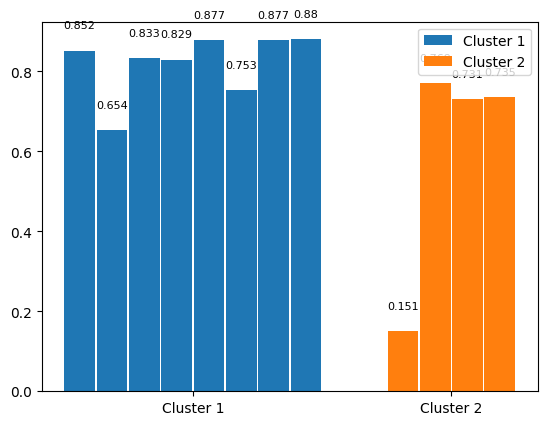

In [ ]:
import collections
def bar_plot(ax, data, group_stretch=0.8, bar_stretch=0.95,
             legend=True, x_labels=True, label_fontsize=8,
             colors=None, barlabel_offset=1,
             bar_labeler=lambda k, i, s: str(round(s, 3))):
    """
    Draws a bar plot with multiple bars per data point.
    :param dict data: The data we want to plot, wher keys are the names of each
      bar group, and items is a list of bar values for the corresponding group.
    :param float group_stretch: 1 means groups occupy the most (largest groups
      touch side to side if they have equal number of bars).
    :param float bar_stretch: If 1, bars within a group will touch side to side.
    :param bool x_labels: If true, x-axis will contain labels with the group
      names given at data, centered at the bar group.
    :param int label_fontsize: Font size for the label on top of each bar.
    :param float barlabel_offset: Distance, in y-values, between the top of the
      bar and its label.
    :param function bar_labeler: If not None, must be a functor with signature
      ``f(group_name, i, scalar)->str``, where each scalar is the entry found at
      data[group_name][i]. When given, returns a label to put on the top of each
      bar. Otherwise no labels on top of bars.
    """
    sorted_data = list(sorted(data.items(), key=lambda elt: elt[0]))
    sorted_k, sorted_v  = zip(*sorted_data)
    max_n_bars = max(len(v) for v in data.values())
    group_centers = np.cumsum([max_n_bars
                               for _ in sorted_data]) - (max_n_bars / 2)
    bar_offset = (1 - bar_stretch) / 2
    bars = collections.defaultdict(list)
    #
    if colors is None:
        colors = {g_name: [f"C{i}" for _ in values]
                  for i, (g_name, values) in enumerate(data.items())}
    #
    for g_i, ((g_name, vals), g_center) in enumerate(zip(sorted_data,
                                                         group_centers)):
        n_bars = len(vals)
        group_beg = g_center - (n_bars / 2) + (bar_stretch / 2)
        for val_i, val in enumerate(vals):
            bar = ax.bar(group_beg + val_i + bar_offset,
                         height=val, width=bar_stretch,
                         color=colors[g_name][val_i])[0]
            bars[g_name].append(bar)
            if  bar_labeler is not None:
                x_pos = bar.get_x() + (bar.get_width() / 2.0)
                y_pos = val + barlabel_offset
                barlbl = bar_labeler(g_name, val_i, val)
                ax.text(x_pos, y_pos, barlbl, ha="center", va="bottom",
                        fontsize=label_fontsize)
    if legend:
        ax.legend([bars[k][0] for k in sorted_k], sorted_k)
    #
    ax.set_xticks(group_centers)
    if x_labels:
        ax.set_xticklabels(sorted_k)
    else:
        ax.set_xticklabels()
    return bars, group_centers

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = {"Cluster 1": silhout_value_c0, "Cluster 2": silhout_value_c1}
bar_plot(ax, data, group_stretch=0.8, bar_stretch=0.95, legend=True,
         x_labels=True, label_fontsize=8, barlabel_offset=0.05,
         bar_labeler=lambda k, i, s: str(round(s, 3)))
fig.show()

In [ ]:
all_silhoutee=[]
range_n_clusters = [2, 3, 4, 5, 6]
from sklearn.metrics import silhouette_samples, silhouette_score
for n_clusters in range_n_clusters:
  my_model = FCM(n_clusters=n_clusters)
  my_model.fit(Solar_curtailment_mean)
  centers = my_model.centers
  cluster_labels = my_model.predict(Solar_curtailment_mean)

  print(soft_pred)
  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(Solar_curtailment_mean, cluster_labels)
  print(
      "For n_clusters =",
      n_clusters,
      "The average silhouette_score is :",
      silhouette_avg,
  )
  all_silhoutee.append(silhouette_avg)
print("The result")
print(range_n_clusters)
print(all_silhoutee)

[0 1 1 1 1 0 0 0 0 0 0 0]
[[9.98277980e-01 1.72202001e-03]
 [3.59105622e-01 6.40894378e-01]
 [4.76338885e-03 9.95236611e-01]
 [2.27515286e-02 9.77248471e-01]
 [4.79045866e-03 9.95209541e-01]
 [9.31159194e-01 6.88408063e-02]
 [9.80129281e-01 1.98707190e-02]
 [9.78739027e-01 2.12609733e-02]
 [9.96974335e-01 3.02566526e-03]
 [9.70495677e-01 2.95043235e-02]
 [9.99743883e-01 2.56117277e-04]
 [9.98510941e-01 1.48905873e-03]]
For n_clusters = 2 The average silhouette_score is : 0.7450742721543723
[1 0 2 2 2 1 1 1 1 1 1 1]
[[2.37830781e-02 9.71214764e-01 5.00215834e-03]
 [9.75913446e-01 9.67754562e-03 1.44090083e-02]
 [1.10428601e-04 2.84727087e-05 9.99861099e-01]
 [2.69148467e-02 8.16090786e-03 9.64924245e-01]
 [8.85842844e-02 1.69223798e-02 8.94493336e-01]
 [3.89607558e-01 5.63087022e-01 4.73054200e-02]
 [3.62090301e-02 9.52880954e-01 1.09100161e-02]
 [3.91001028e-02 9.49011845e-01 1.18880524e-02]
 [1.82364080e-03 9.97709836e-01 4.66523064e-04]
 [1.95380374e-01 7.74181341e-01 3.04382850e-02]

##4.2 clustering data

In [ ]:

seasons=[]
selectedFeatures.append('Wind_Curtailment') #keep the targets
selectedFeatures.append('Solar_Curtailment') #keep the targets
seasons.append(df_mean[df_mean['month'].isin([2,3,4,5])].sort_values(by=['Date','Hour'])[selectedFeatures])
seasons.append(df_mean[df_mean['month'].isin([6,7,8,9,10,11,12,1])].sort_values(by=['Date','Hour'])[selectedFeatures])
seasons[0]

,Solar,Renewables,Imports,Net Load,Generation,Thermal,Large Hydro,Load Less (Generation+Imports),peakStatus,Biomass_geothermal,Wind_Curtailment,Solar_Curtailment
0,0.000000,1848.416667,7413.166667,23074.666667,15940.333333,10405.750000,1399.083333,2.083333,0,1567.583333,0.0,0.0
1,0.000000,1919.833333,7399.666667,21896.750000,14857.916667,9535.833333,1115.166667,-0.666667,0,1559.666667,0.0,0.0
2,0.000000,2010.666667,7468.333333,21390.750000,14402.583333,8836.166667,1269.750000,0.250000,0,1530.333333,0.0,0.0
3,0.000000,2135.166667,7436.250000,21191.500000,14353.250000,8549.750000,1382.083333,0.166667,0,1536.916667,0.0,0.0
4,0.000000,2007.750000,7536.333333,21644.250000,14576.833333,9151.333333,1130.666667,0.750000,0,1538.166667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70844,1329.083333,5347.583333,7355.083333,25817.750000,22055.583333,10668.333333,3760.916667,-0.083333,2,1754.666667,0.0,0.0
70845,49.333333,4745.583333,7854.583333,26540.333333,21647.833333,11196.416667,3426.500000,-0.166667,2,1854.750000,0.0,0.0
70846,0.000000,4634.750000,7908.583333,25989.750000,20903.500000,10685.333333,3304.000000,11.833333,0,1905.666667,0.0,0.0
70847,0.000000,4265.583333,8920.583333,24471.333333,18022.083333,8705.083333,2773.583333,13.333333,0,1810.500000,0.0,0.0


#5.Create test and train dataset

##5.1Config Parameters

In [ ]:
sampling_rate=1
sequence_length=48 #Considering history of timeseris
predict_step=1 #For example the next 1 hour or next 24 hour
delay=sampling_rate*(sequence_length+predict_step-1)
batch_size=128
test_precent=0.20

## 5.2 create timeseries seasonal dataset

In [ ]:

def create_timeseries_dataset(S_X_data,s_y_wind,s_y_solar,s_num_train_samples,delay,sequence_length,sampling_rate,batch_size):
  from keras.utils import timeseries_dataset_from_array
  train_dataset_wind=timeseries_dataset_from_array(
      S_X_data[:-delay],
      sequence_length=sequence_length,
      targets=s_y_wind[delay:],
      sampling_rate=sampling_rate,
      shuffle=True,
      batch_size=batch_size,
      start_index=0,
      end_index=s_num_train_samples

  )
  test_dataset_wind=timeseries_dataset_from_array(
      S_X_data[:-delay],
      sequence_length=sequence_length,
      targets=s_y_wind[delay:],
      sampling_rate=sampling_rate,
      shuffle=True,
      batch_size=batch_size,
      start_index=s_num_train_samples

  )
  #for solar
  from keras.utils import timeseries_dataset_from_array
  train_dataset_solar=timeseries_dataset_from_array(
      S_X_data[:-delay],
      sequence_length=sequence_length,
      targets=s_y_solar[delay:],
      sampling_rate=sampling_rate,
      shuffle=True,
      batch_size=batch_size,
      start_index=0,
      end_index=s_num_train_samples

  )
  test_dataset_solar=timeseries_dataset_from_array(
      S_X_data[:-delay],
      sequence_length=sequence_length,
      targets=s_y_solar[delay:],
      sampling_rate=sampling_rate,
      shuffle=False,
      batch_size=batch_size,
      start_index=s_num_train_samples

  )
  return [train_dataset_wind,test_dataset_wind,train_dataset_solar,test_dataset_solar]

In [ ]:
#
seasons_datasets=[]

for season in seasons:
  num_train_samples=int(len(season)*(1-test_precent))
  num_test_samples=int(len(season)*(test_precent))
  print(num_train_samples,num_test_samples)
  #Seperate features and targets
  X_data=season.reset_index(drop=True).to_numpy()
  y_wind=season['Wind_Curtailment'].reset_index(drop=True).to_numpy()
  y_solar=season['Solar_Curtailment'].reset_index(drop=True).to_numpy()

  #Normalize input data
  mean_4norm=X_data[:num_train_samples].mean(axis=0)
  X_data-=mean_4norm
  std_4norm=X_data[:num_train_samples].std(axis=0)
  X_data/=std_4norm

  #create time series dataset
  #return [train_dataset_wind,test_dataset_wind,train_dataset_solar,test_dataset_solar]
  test_train_datasets=create_timeseries_dataset(X_data,y_wind,y_solar,num_train_samples,delay,sequence_length,sampling_rate,batch_size)
  seasons_datasets.append(test_train_datasets)



19056 4764
38199 9549


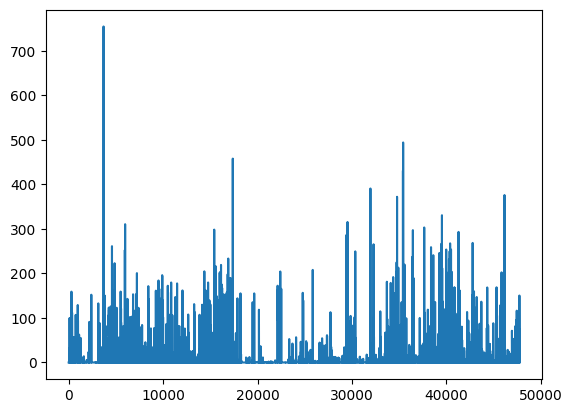

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(y_wind)),y_wind) #the last y_wind from previous for

#6.GRU

##6.1 Solar model

### One layer

In [ ]:
#One LSTM layer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs=keras.Input(shape=(sequence_length,X_data.shape[-1])) #shape=(sequnece_lenght, num of features)
x=layers.GRU(256)(inputs)
x=layers.Dense(16)(x)
outputs=layers.Dense(1,activation="relu")(x)
model_SGRU_solar=keras.Model(inputs,outputs)
model_SGRU_solar.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 12)]          0         
                                                                 
 gru (GRU)                   (None, 256)               207360    
                                                                 
 dense (Dense)               (None, 16)                4112      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 211,489
Trainable params: 211,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Evaluate each seasons with one layer GRU
seasons_MAE=[]
for season_dataset in seasons_datasets:
  callbacks=[keras.callbacks.ModelCheckpoint("solar_season_model",save_best_only=True,monitor="val_loss",mode='min',verbose=1)] #To save best performing model
  train_dataset_solar,test_dataset_solar=season_dataset[2],season_dataset[3]
  season_model=tf.keras.models.clone_model(model_SGRU_solar)
  season_model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  history=season_model.fit(train_dataset_solar,
                             epochs=30,
                             validation_data=test_dataset_solar,
                             callbacks=callbacks)
  season_model=keras.models.load_model("solar_season_model")
  tmp_mae=season_model.evaluate(test_dataset_solar)[1]
  print(f"Test MAE Solar:{tmp_mae:.2f}")
  seasons_MAE.append(tmp_mae)



Epoch 1/30
148/149 [============================>.] - ETA: 0s - loss: 148252.5781 - mae: 135.4988
Epoch 1: val_loss improved from inf to 914109.68750, saving model to solar_season_model


149/149 [==============================] - 27s 127ms/step - loss: 147807.5312 - mae: 135.2554 - val_loss: 914109.6875 - val_mae: 407.8448
Epoch 2/30
146/149 [============================>.] - ETA: 0s - loss: 110206.8359 - mae: 107.1587
Epoch 2: val_loss improved from 914109.68750 to 697878.31250, saving model to solar_season_model


149/149 [==============================] - 13s 84ms/step - loss: 109596.4141 - mae: 106.9780 - val_loss: 697878.3125 - val_mae: 358.2071
Epoch 3/30
146/149 [============================>.] - ETA: 0s - loss: 74500.9453 - mae: 85.7914
Epoch 3: val_loss improved from 697878.31250 to 491056.90625, saving model to solar_season_model


149/149 [==============================] - 9s 62ms/step - loss: 74524.5000 - mae: 85.7032 - val_loss: 491056.9062 - val_mae: 273.4992
Epoch 4/30
148/149 [============================>.] - ETA: 0s - loss: 48520.3867 - mae: 70.1078
Epoch 4: val_loss improved from 491056.90625 to 337717.93750, saving model to solar_season_model


149/149 [==============================] - 9s 60ms/step - loss: 48377.8555 - mae: 69.9769 - val_loss: 337717.9375 - val_mae: 222.5426
Epoch 5/30
147/149 [============================>.] - ETA: 0s - loss: 33426.1172 - mae: 61.0625
Epoch 5: val_loss improved from 337717.93750 to 251944.26562, saving model to solar_season_model


149/149 [==============================] - 8s 55ms/step - loss: 33345.0352 - mae: 61.0514 - val_loss: 251944.2656 - val_mae: 195.2401
Epoch 6/30
147/149 [============================>.] - ETA: 0s - loss: 25538.8262 - mae: 56.8137
Epoch 6: val_loss improved from 251944.26562 to 185012.68750, saving model to solar_season_model


149/149 [==============================] - 11s 71ms/step - loss: 25460.2852 - mae: 56.7459 - val_loss: 185012.6875 - val_mae: 168.4594
Epoch 7/30
147/149 [============================>.] - ETA: 0s - loss: 21482.9473 - mae: 53.8698
Epoch 7: val_loss improved from 185012.68750 to 160841.67188, saving model to solar_season_model


149/149 [==============================] - 10s 65ms/step - loss: 21514.4141 - mae: 53.9752 - val_loss: 160841.6719 - val_mae: 164.1909
Epoch 8/30
146/149 [============================>.] - ETA: 0s - loss: 19727.1973 - mae: 52.4457
Epoch 8: val_loss improved from 160841.67188 to 142370.90625, saving model to solar_season_model


149/149 [==============================] - 12s 82ms/step - loss: 19673.2793 - mae: 52.4030 - val_loss: 142370.9062 - val_mae: 155.5141
Epoch 9/30
146/149 [============================>.] - ETA: 0s - loss: 18327.7422 - mae: 51.1884
Epoch 9: val_loss improved from 142370.90625 to 131793.34375, saving model to solar_season_model


149/149 [==============================] - 9s 60ms/step - loss: 18371.1992 - mae: 51.3197 - val_loss: 131793.3438 - val_mae: 153.2122
Epoch 10/30
145/149 [============================>.] - ETA: 0s - loss: 17504.1328 - mae: 50.1455
Epoch 10: val_loss improved from 131793.34375 to 129379.32031, saving model to solar_season_model


149/149 [==============================] - 8s 53ms/step - loss: 17499.5059 - mae: 50.2260 - val_loss: 129379.3203 - val_mae: 150.2979
Epoch 11/30
148/149 [============================>.] - ETA: 0s - loss: 16827.4414 - mae: 49.4651
Epoch 11: val_loss improved from 129379.32031 to 120562.35938, saving model to solar_season_model


149/149 [==============================] - 10s 64ms/step - loss: 16913.5488 - mae: 49.5776 - val_loss: 120562.3594 - val_mae: 148.5712
Epoch 12/30
147/149 [============================>.] - ETA: 0s - loss: 16336.8330 - mae: 48.5870
Epoch 12: val_loss did not improve from 120562.35938
149/149 [==============================] - 4s 27ms/step - loss: 16271.9600 - mae: 48.5637 - val_loss: 121990.5938 - val_mae: 151.2892
Epoch 13/30
148/149 [============================>.] - ETA: 0s - loss: 15738.6465 - mae: 47.7182
Epoch 13: val_loss improved from 120562.35938 to 114752.30469, saving model to solar_season_model


149/149 [==============================] - 9s 61ms/step - loss: 15727.1758 - mae: 47.7494 - val_loss: 114752.3047 - val_mae: 143.7163
Epoch 14/30
148/149 [============================>.] - ETA: 0s - loss: 15341.5537 - mae: 47.3779
Epoch 14: val_loss did not improve from 114752.30469
149/149 [==============================] - 4s 27ms/step - loss: 15331.9121 - mae: 47.3752 - val_loss: 118616.2656 - val_mae: 146.2244
Epoch 15/30
149/149 [==============================] - ETA: 0s - loss: 14896.6318 - mae: 46.8524
Epoch 15: val_loss improved from 114752.30469 to 112448.05469, saving model to solar_season_model


149/149 [==============================] - 9s 61ms/step - loss: 14896.6318 - mae: 46.8524 - val_loss: 112448.0547 - val_mae: 143.2776
Epoch 16/30
146/149 [============================>.] - ETA: 0s - loss: 14465.6250 - mae: 46.2783
Epoch 16: val_loss did not improve from 112448.05469
149/149 [==============================] - 4s 27ms/step - loss: 14404.0146 - mae: 46.1835 - val_loss: 116751.4219 - val_mae: 146.9614
Epoch 17/30
146/149 [============================>.] - ETA: 0s - loss: 13931.6631 - mae: 45.4336
Epoch 17: val_loss did not improve from 112448.05469
149/149 [==============================] - 6s 37ms/step - loss: 14023.4229 - mae: 45.5325 - val_loss: 113864.3203 - val_mae: 144.8502
Epoch 18/30
146/149 [============================>.] - ETA: 0s - loss: 13471.3730 - mae: 44.8831
Epoch 18: val_loss improved from 112448.05469 to 111482.16406, saving model to solar_season_model


149/149 [==============================] - 8s 54ms/step - loss: 13469.7764 - mae: 44.8700 - val_loss: 111482.1641 - val_mae: 143.5766
Epoch 19/30
148/149 [============================>.] - ETA: 0s - loss: 13200.7451 - mae: 44.5311
Epoch 19: val_loss improved from 111482.16406 to 110212.59375, saving model to solar_season_model


149/149 [==============================] - 10s 64ms/step - loss: 13166.4482 - mae: 44.4602 - val_loss: 110212.5938 - val_mae: 143.1437
Epoch 20/30
149/149 [==============================] - ETA: 0s - loss: 13008.3779 - mae: 44.0979
Epoch 20: val_loss improved from 110212.59375 to 108257.00000, saving model to solar_season_model


149/149 [==============================] - 9s 61ms/step - loss: 13008.3779 - mae: 44.0979 - val_loss: 108257.0000 - val_mae: 142.7335
Epoch 21/30
149/149 [==============================] - ETA: 0s - loss: 12373.5947 - mae: 43.2115
Epoch 21: val_loss improved from 108257.00000 to 108213.46875, saving model to solar_season_model


149/149 [==============================] - 8s 51ms/step - loss: 12373.5947 - mae: 43.2115 - val_loss: 108213.4688 - val_mae: 144.2714
Epoch 22/30
149/149 [==============================] - ETA: 0s - loss: 11966.0098 - mae: 42.7149
Epoch 22: val_loss improved from 108213.46875 to 106945.56250, saving model to solar_season_model


149/149 [==============================] - 10s 64ms/step - loss: 11966.0098 - mae: 42.7149 - val_loss: 106945.5625 - val_mae: 141.4715
Epoch 23/30
146/149 [============================>.] - ETA: 0s - loss: 11751.9727 - mae: 42.5023
Epoch 23: val_loss improved from 106945.56250 to 105094.87500, saving model to solar_season_model


149/149 [==============================] - 9s 58ms/step - loss: 11670.0039 - mae: 42.3698 - val_loss: 105094.8750 - val_mae: 140.2545
Epoch 24/30
146/149 [============================>.] - ETA: 0s - loss: 11033.3242 - mae: 41.2737
Epoch 24: val_loss did not improve from 105094.87500
149/149 [==============================] - 4s 27ms/step - loss: 11011.2529 - mae: 41.2788 - val_loss: 108824.5547 - val_mae: 143.2060
Epoch 25/30
145/149 [============================>.] - ETA: 0s - loss: 10849.6143 - mae: 40.9506
Epoch 25: val_loss improved from 105094.87500 to 104775.64062, saving model to solar_season_model


149/149 [==============================] - 8s 55ms/step - loss: 10728.5488 - mae: 40.7503 - val_loss: 104775.6406 - val_mae: 140.9585
Epoch 26/30
145/149 [============================>.] - ETA: 0s - loss: 10091.3779 - mae: 39.8728
Epoch 26: val_loss improved from 104775.64062 to 102699.75000, saving model to solar_season_model


149/149 [==============================] - 9s 60ms/step - loss: 10072.3447 - mae: 39.8509 - val_loss: 102699.7500 - val_mae: 140.9454
Epoch 27/30
149/149 [==============================] - ETA: 0s - loss: 9714.6846 - mae: 39.0425
Epoch 27: val_loss did not improve from 102699.75000
149/149 [==============================] - 6s 37ms/step - loss: 9714.6846 - mae: 39.0425 - val_loss: 106833.1016 - val_mae: 144.9722
Epoch 28/30
148/149 [============================>.] - ETA: 0s - loss: 9461.1426 - mae: 38.6458
Epoch 28: val_loss did not improve from 102699.75000
149/149 [==============================] - 4s 27ms/step - loss: 9447.5029 - mae: 38.6152 - val_loss: 105849.5781 - val_mae: 144.5221
Epoch 29/30
145/149 [============================>.] - ETA: 0s - loss: 8909.9961 - mae: 37.5690
Epoch 29: val_loss improved from 102699.75000 to 102191.82812, saving model to solar_season_model


149/149 [==============================] - 9s 63ms/step - loss: 8846.4404 - mae: 37.4662 - val_loss: 102191.8281 - val_mae: 141.6791
Epoch 30/30
145/149 [============================>.] - ETA: 0s - loss: 8808.6729 - mae: 37.4162
Epoch 30: val_loss did not improve from 102191.82812
37/37 [==============================] - 2s 29ms/step - loss: 102191.8281 - mae: 141.6791
Test MAE Solar:141.68
Epoch 1/30
296/299 [============================>.] - ETA: 0s - loss: 24311.0430 - mae: 32.7214
Epoch 1: val_loss improved from inf to 47392.81250, saving model to solar_season_model


299/299 [==============================] - 16s 45ms/step - loss: 24684.1875 - mae: 32.8395 - val_loss: 47392.8125 - val_mae: 70.3602
Epoch 2/30
295/299 [============================>.] - ETA: 0s - loss: 17320.0664 - mae: 24.0085
Epoch 2: val_loss improved from 47392.81250 to 30535.83789, saving model to solar_season_model


299/299 [==============================] - 14s 45ms/step - loss: 17241.7422 - mae: 23.9853 - val_loss: 30535.8379 - val_mae: 47.8438
Epoch 3/30
296/299 [============================>.] - ETA: 0s - loss: 13784.6309 - mae: 21.2091
Epoch 3: val_loss improved from 30535.83789 to 22520.18750, saving model to solar_season_model


299/299 [==============================] - 13s 43ms/step - loss: 13705.0273 - mae: 21.1810 - val_loss: 22520.1875 - val_mae: 45.9512
Epoch 4/30
298/299 [============================>.] - ETA: 0s - loss: 11443.3330 - mae: 20.2425
Epoch 4: val_loss improved from 22520.18750 to 18418.49023, saving model to solar_season_model


299/299 [==============================] - 13s 44ms/step - loss: 11440.9355 - mae: 20.2384 - val_loss: 18418.4902 - val_mae: 43.8544
Epoch 5/30
298/299 [============================>.] - ETA: 0s - loss: 9739.6807 - mae: 19.4065
Epoch 5: val_loss improved from 18418.49023 to 16509.63867, saving model to solar_season_model


299/299 [==============================] - 16s 51ms/step - loss: 9737.6523 - mae: 19.4031 - val_loss: 16509.6387 - val_mae: 44.4254
Epoch 6/30
295/299 [============================>.] - ETA: 0s - loss: 8337.2998 - mae: 18.8806
Epoch 6: val_loss improved from 16509.63867 to 14689.63281, saving model to solar_season_model


299/299 [==============================] - 14s 47ms/step - loss: 8294.5986 - mae: 18.8469 - val_loss: 14689.6328 - val_mae: 42.6453
Epoch 7/30
297/299 [============================>.] - ETA: 0s - loss: 7135.9497 - mae: 18.2719
Epoch 7: val_loss did not improve from 14689.63281
299/299 [==============================] - 10s 33ms/step - loss: 7125.7554 - mae: 18.2708 - val_loss: 14897.6143 - val_mae: 49.1446
Epoch 8/30
296/299 [============================>.] - ETA: 0s - loss: 6176.9253 - mae: 17.8052
Epoch 8: val_loss improved from 14689.63281 to 14053.07324, saving model to solar_season_model


299/299 [==============================] - 14s 45ms/step - loss: 6150.7832 - mae: 17.7964 - val_loss: 14053.0732 - val_mae: 41.9812
Epoch 9/30
297/299 [============================>.] - ETA: 0s - loss: 5507.1396 - mae: 17.5091
Epoch 9: val_loss did not improve from 14053.07324
299/299 [==============================] - 10s 32ms/step - loss: 5496.0859 - mae: 17.4940 - val_loss: 15372.6836 - val_mae: 46.2231
Epoch 10/30
297/299 [============================>.] - ETA: 0s - loss: 4804.4922 - mae: 16.9818
Epoch 10: val_loss did not improve from 14053.07324
299/299 [==============================] - 8s 27ms/step - loss: 4788.6128 - mae: 16.9432 - val_loss: 14672.5918 - val_mae: 46.0140
Epoch 11/30
299/299 [==============================] - ETA: 0s - loss: 4426.3804 - mae: 16.7613
Epoch 11: val_loss did not improve from 14053.07324
299/299 [==============================] - 9s 30ms/step - loss: 4426.3804 - mae: 16.7613 - val_loss: 15102.1152 - val_mae: 44.6897
Epoch 12/30
299/299 [===========

In [ ]:
print(seasons_MAE)
print(seasons_MAE[0]*0.25+seasons_MAE[1]*0.75)

[141.6791229248047, 41.98117446899414]
66.90566158294678


In [ ]:
#[142.54150390625, 40.982337951660156]
#66.37212944030762

### Multi layers

In [ ]:
#Multi layers LSTM

from tensorflow import keras
from tensorflow.keras import layers

inputs=keras.Input(shape=(sequence_length,X_data.shape[-1])) #shape=(sequnece_lenght, num of features)
x=layers.GRU(128,return_sequences=True)(inputs)
x=layers.GRU(64)(x)
x=layers.Dense(32)(x)
outputs=layers.Dense(1,activation="relu")(x)
model_mGRU_solar=keras.Model(inputs,outputs)


In [ ]:
#Evaluate each seasons with one layer GRU
seasons_MAE=[]
for season_dataset in seasons_datasets:
  callbacks=[keras.callbacks.ModelCheckpoint("solar_season_model",save_best_only=True,monitor="val_loss",mode='min',verbose=1)] #To save best performing model
  train_dataset_solar,test_dataset_solar=season_dataset[2],season_dataset[3]
  season_model=tf.keras.models.clone_model(model_mGRU_solar)
  season_model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  history=season_model.fit(train_dataset_solar,
                             epochs=30,
                             validation_data=test_dataset_solar,
                             callbacks=callbacks)
  season_model=keras.models.load_model("solar_season_model")
  tmp_mae=season_model.evaluate(test_dataset_solar)[1]
  print(f"Test MAE Solar:{tmp_mae:.2f}")
  seasons_MAE.append(tmp_mae)

Epoch 1/30
147/149 [============================>.] - ETA: 0s - loss: 156417.7344 - mae: 122.8281
Epoch 1: val_loss improved from inf to 998336.06250, saving model to solar_season_model


149/149 [==============================] - 18s 87ms/step - loss: 155607.4375 - mae: 122.3243 - val_loss: 998336.0625 - val_mae: 426.2424
Epoch 2/30
149/149 [==============================] - ETA: 0s - loss: 128770.8281 - mae: 106.6460
Epoch 2: val_loss improved from 998336.06250 to 854191.18750, saving model to solar_season_model


149/149 [==============================] - 13s 87ms/step - loss: 128770.8281 - mae: 106.6460 - val_loss: 854191.1875 - val_mae: 374.8698
Epoch 3/30
148/149 [============================>.] - ETA: 0s - loss: 100046.2031 - mae: 88.5867
Epoch 3: val_loss improved from 854191.18750 to 695730.00000, saving model to solar_season_model


149/149 [==============================] - 13s 85ms/step - loss: 100072.2422 - mae: 88.5850 - val_loss: 695730.0000 - val_mae: 326.1941
Epoch 4/30
147/149 [============================>.] - ETA: 0s - loss: 75645.5156 - mae: 77.4139
Epoch 4: val_loss improved from 695730.00000 to 550735.50000, saving model to solar_season_model


149/149 [==============================] - 12s 78ms/step - loss: 75339.9766 - mae: 77.3554 - val_loss: 550735.5000 - val_mae: 278.3835
Epoch 5/30
146/149 [============================>.] - ETA: 0s - loss: 56607.0781 - mae: 69.7862
Epoch 5: val_loss improved from 550735.50000 to 425126.59375, saving model to solar_season_model


149/149 [==============================] - 12s 82ms/step - loss: 56014.7383 - mae: 69.4396 - val_loss: 425126.5938 - val_mae: 240.2311
Epoch 6/30
149/149 [==============================] - ETA: 0s - loss: 41316.9883 - mae: 63.2586
Epoch 6: val_loss improved from 425126.59375 to 328430.87500, saving model to solar_season_model


149/149 [==============================] - 14s 95ms/step - loss: 41316.9883 - mae: 63.2586 - val_loss: 328430.8750 - val_mae: 219.2701
Epoch 7/30
146/149 [============================>.] - ETA: 0s - loss: 31468.3223 - mae: 58.2400
Epoch 7: val_loss improved from 328430.87500 to 255414.89062, saving model to solar_season_model


149/149 [==============================] - 12s 82ms/step - loss: 31457.7227 - mae: 58.3177 - val_loss: 255414.8906 - val_mae: 185.3762
Epoch 8/30
147/149 [============================>.] - ETA: 0s - loss: 25323.4648 - mae: 54.9780
Epoch 8: val_loss improved from 255414.89062 to 214247.70312, saving model to solar_season_model


149/149 [==============================] - 19s 126ms/step - loss: 25158.5742 - mae: 54.8511 - val_loss: 214247.7031 - val_mae: 172.2357
Epoch 9/30
148/149 [============================>.] - ETA: 0s - loss: 21752.3379 - mae: 52.5981
Epoch 9: val_loss improved from 214247.70312 to 180761.43750, saving model to solar_season_model


149/149 [==============================] - 13s 84ms/step - loss: 21742.3301 - mae: 52.6086 - val_loss: 180761.4375 - val_mae: 161.9109
Epoch 10/30
148/149 [============================>.] - ETA: 0s - loss: 19489.0566 - mae: 51.3026
Epoch 10: val_loss improved from 180761.43750 to 165120.40625, saving model to solar_season_model


149/149 [==============================] - 16s 103ms/step - loss: 19452.9160 - mae: 51.2898 - val_loss: 165120.4062 - val_mae: 158.9697
Epoch 11/30
148/149 [============================>.] - ETA: 0s - loss: 18037.5430 - mae: 50.0660
Epoch 11: val_loss improved from 165120.40625 to 157099.60938, saving model to solar_season_model


149/149 [==============================] - 15s 99ms/step - loss: 18008.8711 - mae: 50.0415 - val_loss: 157099.6094 - val_mae: 157.0179
Epoch 12/30
145/149 [============================>.] - ETA: 0s - loss: 17548.6035 - mae: 49.3680
Epoch 12: val_loss improved from 157099.60938 to 137558.73438, saving model to solar_season_model


149/149 [==============================] - 13s 85ms/step - loss: 17375.3848 - mae: 49.1142 - val_loss: 137558.7344 - val_mae: 154.2041
Epoch 13/30
148/149 [============================>.] - ETA: 0s - loss: 16369.2598 - mae: 48.4260
Epoch 13: val_loss improved from 137558.73438 to 131920.26562, saving model to solar_season_model


149/149 [==============================] - 12s 78ms/step - loss: 16379.2832 - mae: 48.4592 - val_loss: 131920.2656 - val_mae: 145.6320
Epoch 14/30
146/149 [============================>.] - ETA: 0s - loss: 16374.6680 - mae: 48.2509
Epoch 14: val_loss improved from 131920.26562 to 128981.86719, saving model to solar_season_model


149/149 [==============================] - 13s 87ms/step - loss: 16225.5938 - mae: 48.0233 - val_loss: 128981.8672 - val_mae: 148.5768
Epoch 15/30
146/149 [============================>.] - ETA: 0s - loss: 15697.1709 - mae: 47.5867
Epoch 15: val_loss improved from 128981.86719 to 125447.52344, saving model to solar_season_model


149/149 [==============================] - 13s 87ms/step - loss: 15614.2295 - mae: 47.4557 - val_loss: 125447.5234 - val_mae: 147.1303
Epoch 16/30
149/149 [==============================] - ETA: 0s - loss: 15158.6602 - mae: 46.7912
Epoch 16: val_loss improved from 125447.52344 to 120154.05469, saving model to solar_season_model


149/149 [==============================] - 12s 82ms/step - loss: 15158.6602 - mae: 46.7912 - val_loss: 120154.0547 - val_mae: 147.3881
Epoch 17/30
146/149 [============================>.] - ETA: 0s - loss: 14994.7178 - mae: 46.4144
Epoch 17: val_loss improved from 120154.05469 to 119881.57812, saving model to solar_season_model


149/149 [==============================] - 13s 87ms/step - loss: 14954.5518 - mae: 46.4139 - val_loss: 119881.5781 - val_mae: 148.5160
Epoch 18/30
146/149 [============================>.] - ETA: 0s - loss: 14506.5752 - mae: 45.9368
Epoch 18: val_loss improved from 119881.57812 to 119614.46094, saving model to solar_season_model


149/149 [==============================] - 13s 85ms/step - loss: 14449.3193 - mae: 45.8539 - val_loss: 119614.4609 - val_mae: 142.7180
Epoch 19/30
149/149 [==============================] - ETA: 0s - loss: 14141.0156 - mae: 45.4207
Epoch 19: val_loss improved from 119614.46094 to 114337.86719, saving model to solar_season_model


149/149 [==============================] - 13s 84ms/step - loss: 14141.0156 - mae: 45.4207 - val_loss: 114337.8672 - val_mae: 140.6754
Epoch 20/30
145/149 [============================>.] - ETA: 0s - loss: 13868.7646 - mae: 45.4220
Epoch 20: val_loss did not improve from 114337.86719
149/149 [==============================] - 5s 35ms/step - loss: 13831.2393 - mae: 45.3454 - val_loss: 116559.4766 - val_mae: 147.3086
Epoch 21/30
149/149 [==============================] - ETA: 0s - loss: 13420.5986 - mae: 44.8595
Epoch 21: val_loss did not improve from 114337.86719
149/149 [==============================] - 6s 40ms/step - loss: 13420.5986 - mae: 44.8595 - val_loss: 116937.5234 - val_mae: 143.8962
Epoch 22/30
147/149 [============================>.] - ETA: 0s - loss: 13006.5312 - mae: 44.3454
Epoch 22: val_loss did not improve from 114337.86719
149/149 [==============================] - 4s 29ms/step - loss: 13090.7988 - mae: 44.4424 - val_loss: 120953.2812 - val_mae: 146.9065
Epoch 23/30
1

149/149 [==============================] - 13s 83ms/step - loss: 11226.8018 - mae: 41.8309 - val_loss: 112131.8516 - val_mae: 148.4156
Epoch 29/30
149/149 [==============================] - ETA: 0s - loss: 10688.5322 - mae: 40.9403
Epoch 29: val_loss did not improve from 112131.85156
149/149 [==============================] - 4s 28ms/step - loss: 10688.5322 - mae: 40.9403 - val_loss: 117290.5078 - val_mae: 145.5306
Epoch 30/30
149/149 [==============================] - ETA: 0s - loss: 10460.6680 - mae: 40.5620
Epoch 30: val_loss did not improve from 112131.85156
37/37 [==============================] - 1s 19ms/step - loss: 112131.8516 - mae: 148.4156
Test MAE Solar:148.42
Epoch 1/30
296/299 [============================>.] - ETA: 0s - loss: 26521.5254 - mae: 31.3382
Epoch 1: val_loss improved from inf to 56053.26953, saving model to solar_season_model


299/299 [==============================] - 24s 66ms/step - loss: 26534.1641 - mae: 31.3282 - val_loss: 56053.2695 - val_mae: 62.4197
Epoch 2/30
297/299 [============================>.] - ETA: 0s - loss: 19774.6035 - mae: 24.1944
Epoch 2: val_loss improved from 56053.26953 to 38424.31641, saving model to solar_season_model


299/299 [==============================] - 18s 59ms/step - loss: 19975.6094 - mae: 24.2626 - val_loss: 38424.3164 - val_mae: 51.3360
Epoch 3/30
296/299 [============================>.] - ETA: 0s - loss: 16256.1465 - mae: 21.8565
Epoch 3: val_loss improved from 38424.31641 to 30175.54297, saving model to solar_season_model


299/299 [==============================] - 17s 58ms/step - loss: 16152.1123 - mae: 21.7826 - val_loss: 30175.5430 - val_mae: 49.6658
Epoch 4/30
295/299 [============================>.] - ETA: 0s - loss: 13937.6025 - mae: 20.7155
Epoch 4: val_loss improved from 30175.54297 to 24147.43359, saving model to solar_season_model


299/299 [==============================] - 18s 60ms/step - loss: 13960.2520 - mae: 20.7711 - val_loss: 24147.4336 - val_mae: 44.3969
Epoch 5/30
296/299 [============================>.] - ETA: 0s - loss: 12380.0244 - mae: 19.9816
Epoch 5: val_loss improved from 24147.43359 to 20214.92969, saving model to solar_season_model


299/299 [==============================] - 17s 56ms/step - loss: 12356.2227 - mae: 19.9983 - val_loss: 20214.9297 - val_mae: 43.9823
Epoch 6/30
296/299 [============================>.] - ETA: 0s - loss: 10853.5244 - mae: 19.5114
Epoch 6: val_loss improved from 20214.92969 to 17909.17578, saving model to solar_season_model


299/299 [==============================] - 18s 59ms/step - loss: 10999.6055 - mae: 19.5803 - val_loss: 17909.1758 - val_mae: 42.1304
Epoch 7/30
297/299 [============================>.] - ETA: 0s - loss: 9900.1807 - mae: 19.0944
Epoch 7: val_loss did not improve from 17909.17578
299/299 [==============================] - 9s 29ms/step - loss: 9874.9180 - mae: 19.0918 - val_loss: 18678.9863 - val_mae: 44.2727
Epoch 8/30
297/299 [============================>.] - ETA: 0s - loss: 8903.8613 - mae: 18.8168
Epoch 8: val_loss improved from 17909.17578 to 15303.81934, saving model to solar_season_model


299/299 [==============================] - 18s 59ms/step - loss: 8874.8877 - mae: 18.7871 - val_loss: 15303.8193 - val_mae: 40.4384
Epoch 9/30
295/299 [============================>.] - ETA: 0s - loss: 8014.8052 - mae: 18.3698
Epoch 9: val_loss did not improve from 15303.81934
299/299 [==============================] - 9s 28ms/step - loss: 8053.8979 - mae: 18.3869 - val_loss: 15340.0234 - val_mae: 44.5060
Epoch 10/30
298/299 [============================>.] - ETA: 0s - loss: 7272.9624 - mae: 18.1011
Epoch 10: val_loss improved from 15303.81934 to 13881.88965, saving model to solar_season_model


299/299 [==============================] - 17s 58ms/step - loss: 7271.4927 - mae: 18.0989 - val_loss: 13881.8896 - val_mae: 40.2854
Epoch 11/30
298/299 [============================>.] - ETA: 0s - loss: 6560.0396 - mae: 17.7798
Epoch 11: val_loss did not improve from 13881.88965
299/299 [==============================] - 9s 29ms/step - loss: 6558.9229 - mae: 17.7788 - val_loss: 14461.9912 - val_mae: 41.1591
Epoch 12/30
299/299 [==============================] - ETA: 0s - loss: 5930.6455 - mae: 17.4337
Epoch 12: val_loss did not improve from 13881.88965
299/299 [==============================] - 10s 33ms/step - loss: 5930.6455 - mae: 17.4337 - val_loss: 15258.0674 - val_mae: 41.0278
Epoch 13/30
298/299 [============================>.] - ETA: 0s - loss: 5444.3525 - mae: 17.1955
Epoch 13: val_loss did not improve from 13881.88965
299/299 [==============================] - 10s 33ms/step - loss: 5443.3896 - mae: 17.1960 - val_loss: 15392.8477 - val_mae: 42.9947
Epoch 14/30
299/299 [========

KeyboardInterrupt: ignored

In [ ]:
print(seasons_MAE)
print(seasons_MAE[0]*0.25+seasons_MAE[1]*0.75)

In [ ]:
#[142.4591827392578, 39.47489547729492]
#65.22096729278564

### With drop out

In [ ]:
#Multi layers LSTM with drop out

from tensorflow import keras
from tensorflow.keras import layers

inputs=keras.Input(shape=(sequence_length,X_data.shape[-1])) #shape=(sequnece_lenght, num of features)
x=layers.GRU(128,return_sequences=True,recurrent_dropout=0.25)(inputs)
x=layers.Dropout(0.25)(x)
x=layers.GRU(128)(x)
x=layers.Dense(32)(x)
outputs=layers.Dense(1,activation="relu")(x)
model_dGRU_solar=keras.Model(inputs,outputs)
model_dGRU_solar.summary()


In [ ]:
#Evaluate each seasons with one layer GRU
import tensorflow as tf
seasons_MAE=[]
for season_dataset in seasons_datasets:
  callbacks=[keras.callbacks.ModelCheckpoint("solar_season_model",save_best_only=True,monitor="val_loss",mode='min',verbose=1)] #To save best performing model
  train_dataset_solar,test_dataset_solar=season_dataset[2],season_dataset[3]
  season_model=tf.keras.models.clone_model(model_dGRU_solar)
  season_model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  history=season_model.fit(train_dataset_solar,
                             epochs=30,
                             validation_data=test_dataset_solar,
                             callbacks=callbacks)
  season_model=keras.models.load_model("solar_season_model")
  tmp_mae=season_model.evaluate(test_dataset_solar)[1]
  print(f"Test MAE Solar:{tmp_mae:.2f}")
  seasons_MAE.append(tmp_mae)

In [ ]:
print(seasons_MAE)
print(seasons_MAE[0]*0.25+seasons_MAE[1]*0.75)

In [ ]:
#[146.4301300048828, 42.88483428955078]
#68.77115821838379

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig('my_plot.png')
plt.close()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()